In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# re-size all the images to this
IMAGE_SIZE = (299,299,3)

train_path = '/content/drive/MyDrive/Dataset/Training_Data'
valid_path = '/content/drive/MyDrive/Dataset/Test_Data'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Training_Data/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Training_Data',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 346 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test_Data',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 78 images belonging to 4 classes.


In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
11/11 [==============================] - 90s 7s/step - loss: 9.5726 - accuracy: 0.3988 - val_loss: 9.7687 - val_accuracy: 0.4103
Epoch 2/100
11/11 [==============================] - 13s 1s/step - loss: 4.5765 - accuracy: 0.6474 - val_loss: 7.3181 - val_accuracy: 0.4359
Epoch 3/100
11/11 [==============================] - 13s 1s/step - loss: 1.9236 - accuracy: 0.8035 - val_loss: 11.0982 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 13s 1s/step - loss: 2.2909 - accuracy: 0.7948 - val_loss: 7.8172 - val_accuracy: 0.6026
Epoch 5/100
11/11 [==============================] - 13s 1s/step - loss: 1.3531 - accuracy: 0.8584 - val_loss: 8.2416 - val_accuracy: 0.4744
Epoch 6/100
11/11 [==============================] - 13s 1s/step - loss: 0.8924 - accuracy: 0.8960 - val_loss: 8.1632 - val_accuracy: 0.5769
Epoch 7/100
11/11 [==============================] - 13s 1s/step - loss: 0.5778 - accuracy: 0.9191 - val_loss: 9.1792 - val_accuracy: 0.5641
Epoch 8/100


In [16]:
print("Accuracy of the model is-" , model.evaluate(training_set)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_set)[0])

11/11 [==============================] - 11s 1s/step - loss: 0.4182 - accuracy: 0.9538
Accuracy of the model is- 95.37572264671326 %
3/3 [==============================] - 2s 423ms/step - loss: 23.6045 - accuracy: 0.5641
loss of the model is- 23.60453224182129


In [18]:
import matplotlib.pyplot as plt

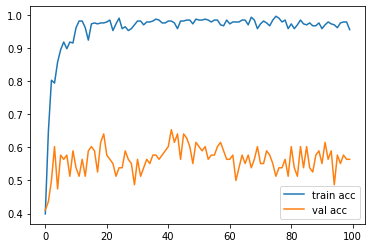

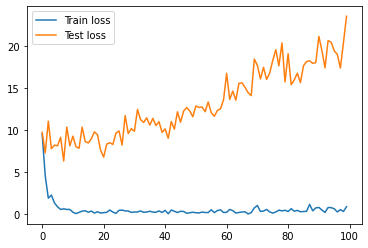

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plot the loss
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/model_inception.h5')

In [21]:

y_pred = model.predict(test_set)

In [22]:

y_pred

array([[2.09215889e-03, 3.86640020e-02, 4.69152510e-01, 4.90091264e-01],
       [0.00000000e+00, 1.00000000e+00, 2.13952323e-13, 1.28228837e-29],
       [2.76891263e-22, 2.41205652e-17, 1.32711651e-02, 9.86728847e-01],
       [1.09763536e-31, 1.76648594e-12, 1.06178947e-15, 1.00000000e+00],
       [1.13710478e-25, 8.93513955e-21, 1.00000000e+00, 1.62068914e-33],
       [2.75483141e-28, 1.00000000e+00, 2.48296866e-14, 7.45927142e-09],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.59317163e-28, 4.86653531e-03, 4.37731051e-09, 9.95133460e-01],
       [1.48486217e-13, 1.00000000e+00, 9.39222227e-18, 1.12323281e-30],
       [0.00000000e+00, 2.41656734e-28, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.60469056e-25, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.39733188e-24, 0.00000000e+00],
       [2.05813134e-29, 1.00000000e+00, 2.20160705e